In [1]:
# importomg necessary packages
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

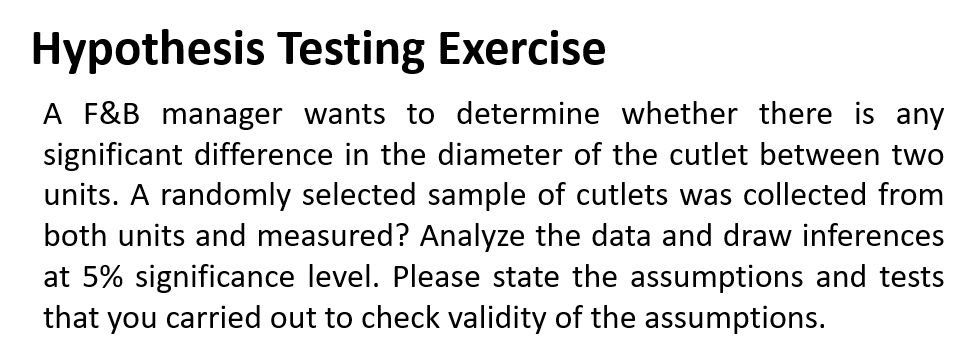

In [18]:
ImageGrab.grabclipboard()


There are 2 samples Unit A and Unit B - this is 2 Tail t test

Will check whether the mean of both samples are different and is there any significance difference between the two samples?

Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

Null hypothesis H0: $\mu1$ = $\mu2$

Altenate hypothesis H1: $\mu1$ ≠ $\mu2$

Decide a cut-off value

Significance 5% 

alpha = 0.05

As it is a two-tailed test

alpha/2 = 0.025

In [3]:
df = pd.read_csv("Cutlets.csv")

In [4]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,Unit A,Unit B


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


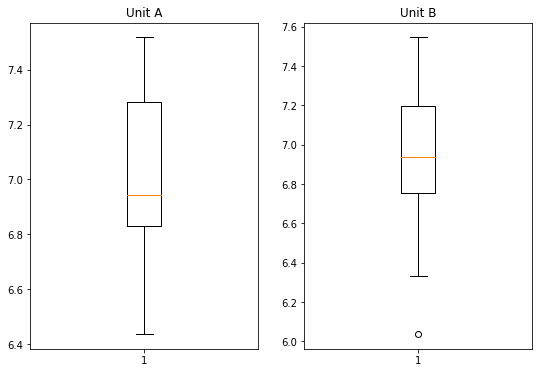

In [10]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B')
plt.show()

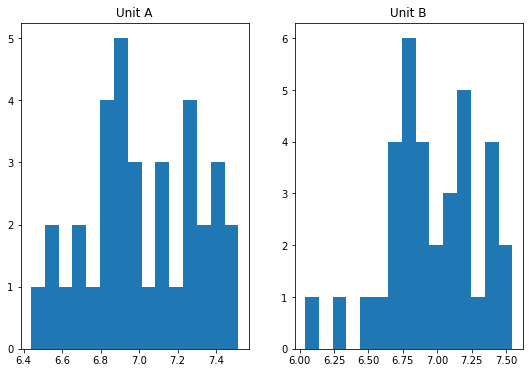

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

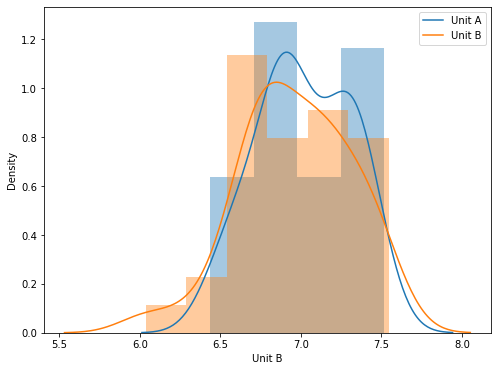

In [12]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(df['Unit A'], kde = True)
sns.distplot(df['Unit B'],hist = True)
plt.legend(labels)

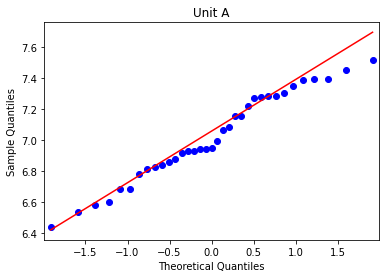

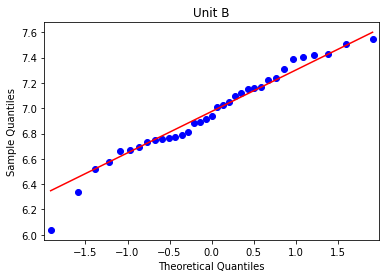

In [13]:
sm.qqplot(df["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(df["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [14]:
statistic,p_value = stats.ttest_ind(df['Unit A'],df['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


Compare p_value with '$\alpha$' (Significane Level)

If p_value is  ≠ '$\alpha$' we failed to reject Null Hypothesis because of lack of evidence

If p_value is = '$\alpha$' we reject Null Hypothesis

interpreting p-value

In [15]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')
    

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

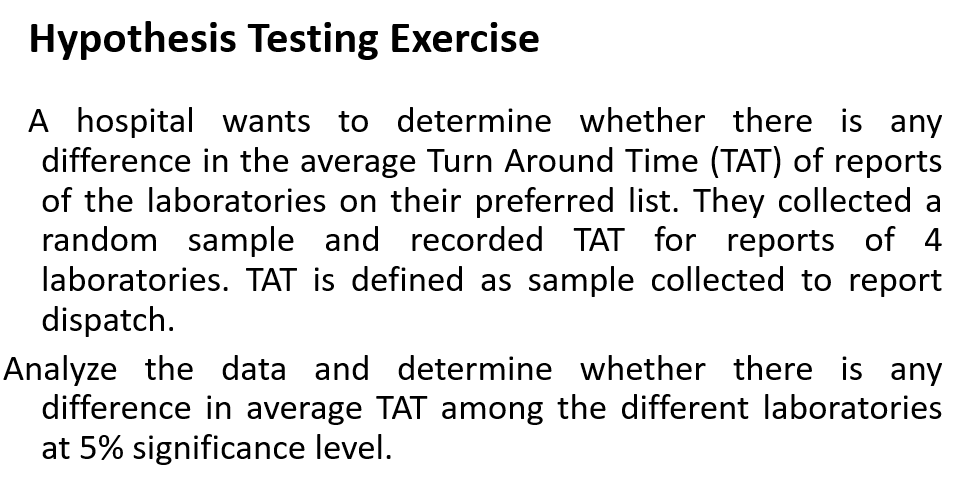

In [20]:
ImageGrab.grabclipboard()

We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

We need to check whether the mean of any of these samples are different or the same?

Step 1

Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

Null Hypothesis:  $\mu1$ = $\mu2$  = $\mu3$ = $\mu4$

Alternative Hypthosis: Atleast One of them is Differente

Step 2

Decide a cut-off value

Significance 5%

alpha = 0.05

Step 3

Collect evidence


In [21]:
labdata= pd.read_csv('LabTAT.csv')

In [22]:
labdata

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [24]:
labdata.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


Checking for Null Values

In [25]:
labdata.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

Checking for Duplicate Values

In [28]:
labdata[labdata.duplicated()].shape

(0, 4)

Checking the data type

In [30]:
labdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


Plotting the data

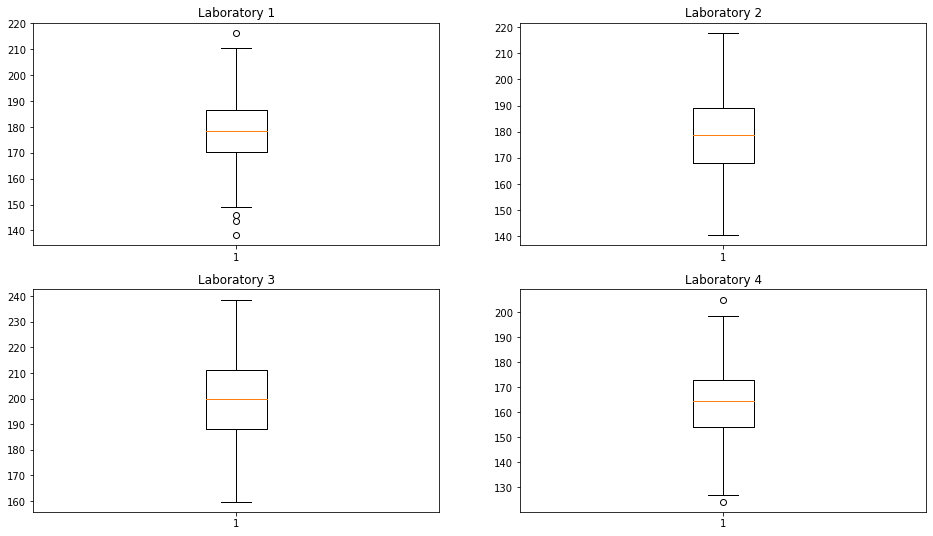

In [31]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labdata['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labdata['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labdata['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labdata['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

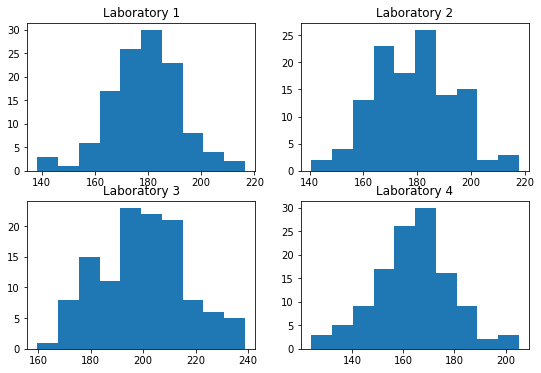

In [36]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labdata['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labdata['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labdata['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labdata['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

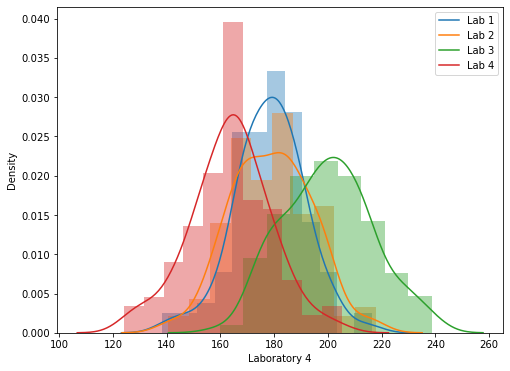

In [33]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labdata['Laboratory 1'], kde = True)
sns.distplot(labdata['Laboratory 2'],hist = True)
sns.distplot(labdata['Laboratory 3'],hist = True)
sns.distplot(labdata['Laboratory 4'],hist = True)
plt.legend(labels)

Plotting Q-Q plot to check whether the distribution follows normal distribution or not

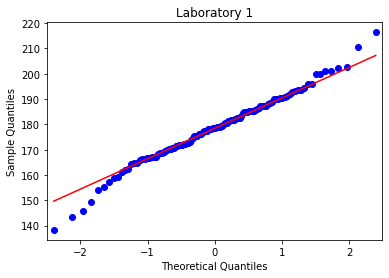

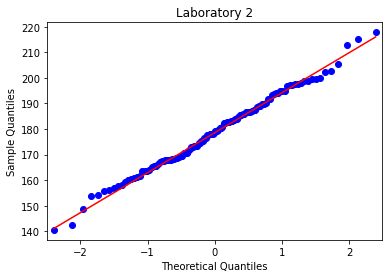

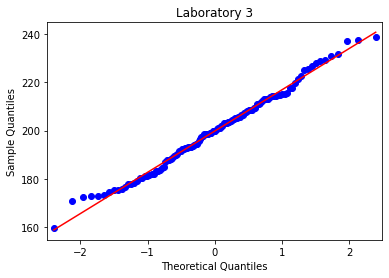

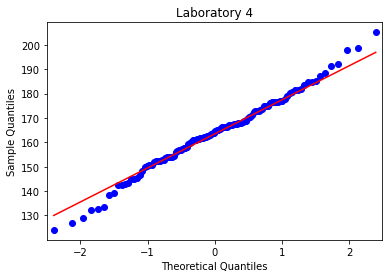

In [34]:
sm.qqplot(labdata['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labdata['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labdata['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labdata['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

Step 4

Compare Evidences with Hypothesis using t-statictic

In [37]:
test_statistic, p_value = stats.f_oneway(labdata.iloc[:,0],labdata.iloc[:,1],labdata.iloc[:,2],labdata.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


Compare p_value with ' '(Significane Level)

If p_value is not equals to '$\alpha$'  - we failed to reject Null Hypothesis because of lack of evidence

If p_value is = '$\alpha$' - we reject Null Hypothesis

interpreting p-value

In [38]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


Hence, We reject Null Hypothesis based on collected evidence, there is significant difference between the samples

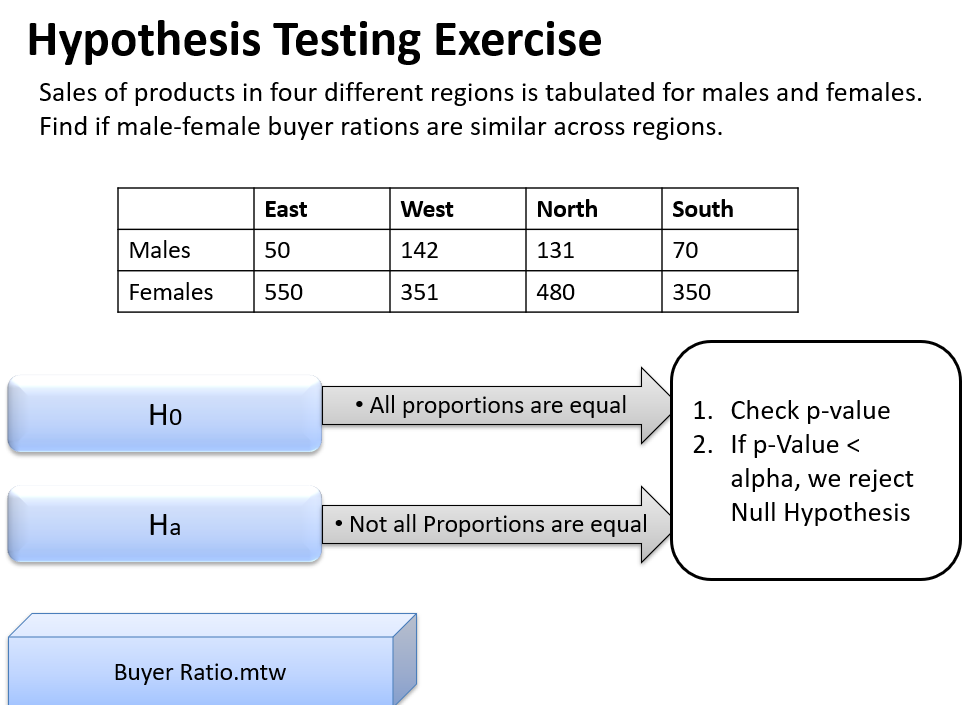

In [47]:
ImageGrab.grabclipboard()

We are going to conduct a Test of Independence using Chi-Square  test with Contingency table

We need to check whether the proportion of any of these samples are different or the same?

Step 1

Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions

Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions

Step 2

Decide a cut-off value

Significance 5%

alpha = 0.05

As it is a one-tailed test

alpha = 1-0.95 = 0.05

Step 3

**Collect evidence**

Importing Files

In [48]:
buyer = pd.read_csv('BuyerRatio.csv', index_col = 0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [49]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [50]:
table

[[50, 142, 131, 70], [435, 1523, 1356, 750]]

**Applying Chi-Square $\times2$ contingency table to convert observed value into expected value**

In [51]:
stat, p, dof, exp = stats.chi2_contingency(buyer) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [52]:
stats.chi2_contingency(table) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [53]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

**Step 4**

Comparing Evidence with Hypothesis

In [54]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


Compare p_value with ' '(Significane Level)

If p_value is $\neq$ '$\alpha$ ' - we failed to reject Null Hypothesis because of lack of evidence

If p_value is = '$\alpha$' - we reject Null Hypothesis

interpreting p-value

In [55]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


**We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples**

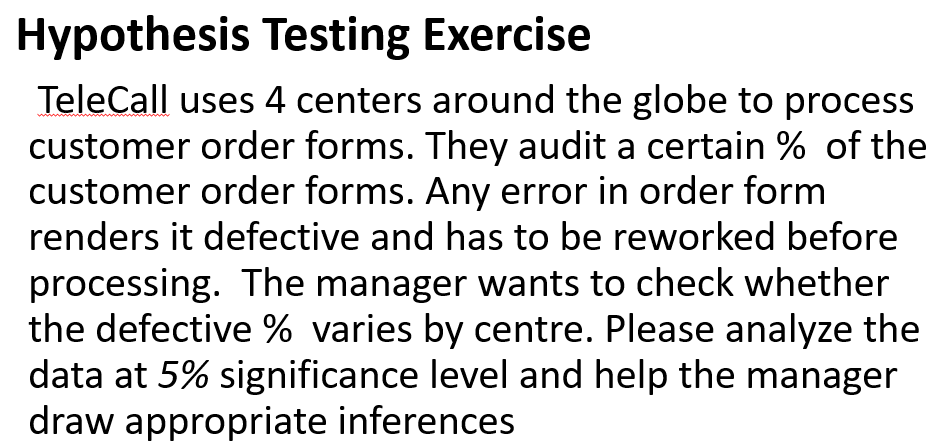

In [56]:
ImageGrab.grabclipboard()

We are going to conduct a Test of Independence using Chi-Square  test with Contingency table

We need to check whether the mean of any of these samples are different or the same?

**Step 1**

Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

* **Null Hypothesis:** $\mu1$ =$\mu2$  = $\mu3$ = $\mu4$
    
* **Alternative Hypthosis:** Atleast One of them is Differente
    
**Step 2**

Decide a cut-off value

Significance 5%

alpha = 0.05

**Step 3**

Collect evidence

Importing Files

In [60]:
centers = pd.read_csv('Costomer+OrderForm.csv')
centers

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [63]:
##Applying Descriptive Statistics
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [64]:
# Checking for Null Values
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [65]:
centers[centers.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [66]:
# Checking the data type

centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [69]:
# Checking value counts in data

print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [70]:
# Creating Contingency table
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [71]:
# Calculating Expected Values for Observed data
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [72]:
# Defining Expected values and observed values
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

**Step 4**

Compare Evidences with Hypothesis using t-statictic

In [74]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


Plotting the data

Compare p_value with '$\alpha$' (Significane Level)

If p_value is '$\neq$ ''$\alpha$ '- we failed to reject Null Hypothesis because of lack of evidence

If p_value is = ''$\alpha$' - we reject Null Hypothesis

interpreting p-value

In [75]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


**We fail to reject Null Hypothesis because of lack of evidence.**